importing the required modules

In [1]:
import numpy as n 
from tensorflow.keras import datasets
import matplotlib.pyplot as plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

loading the dataset and splitting

In [2]:
Dataset_CIFAR10 = datasets.cifar10.load_data()

In [3]:
training_dataset = Dataset_CIFAR10[0]
test_dataset = Dataset_CIFAR10[1]

In [4]:
input_Training = training_dataset[0]
output_training = training_dataset[1]

input_Testing = test_dataset[0]
output_testing = test_dataset[1]

displaying sample images of the dataset

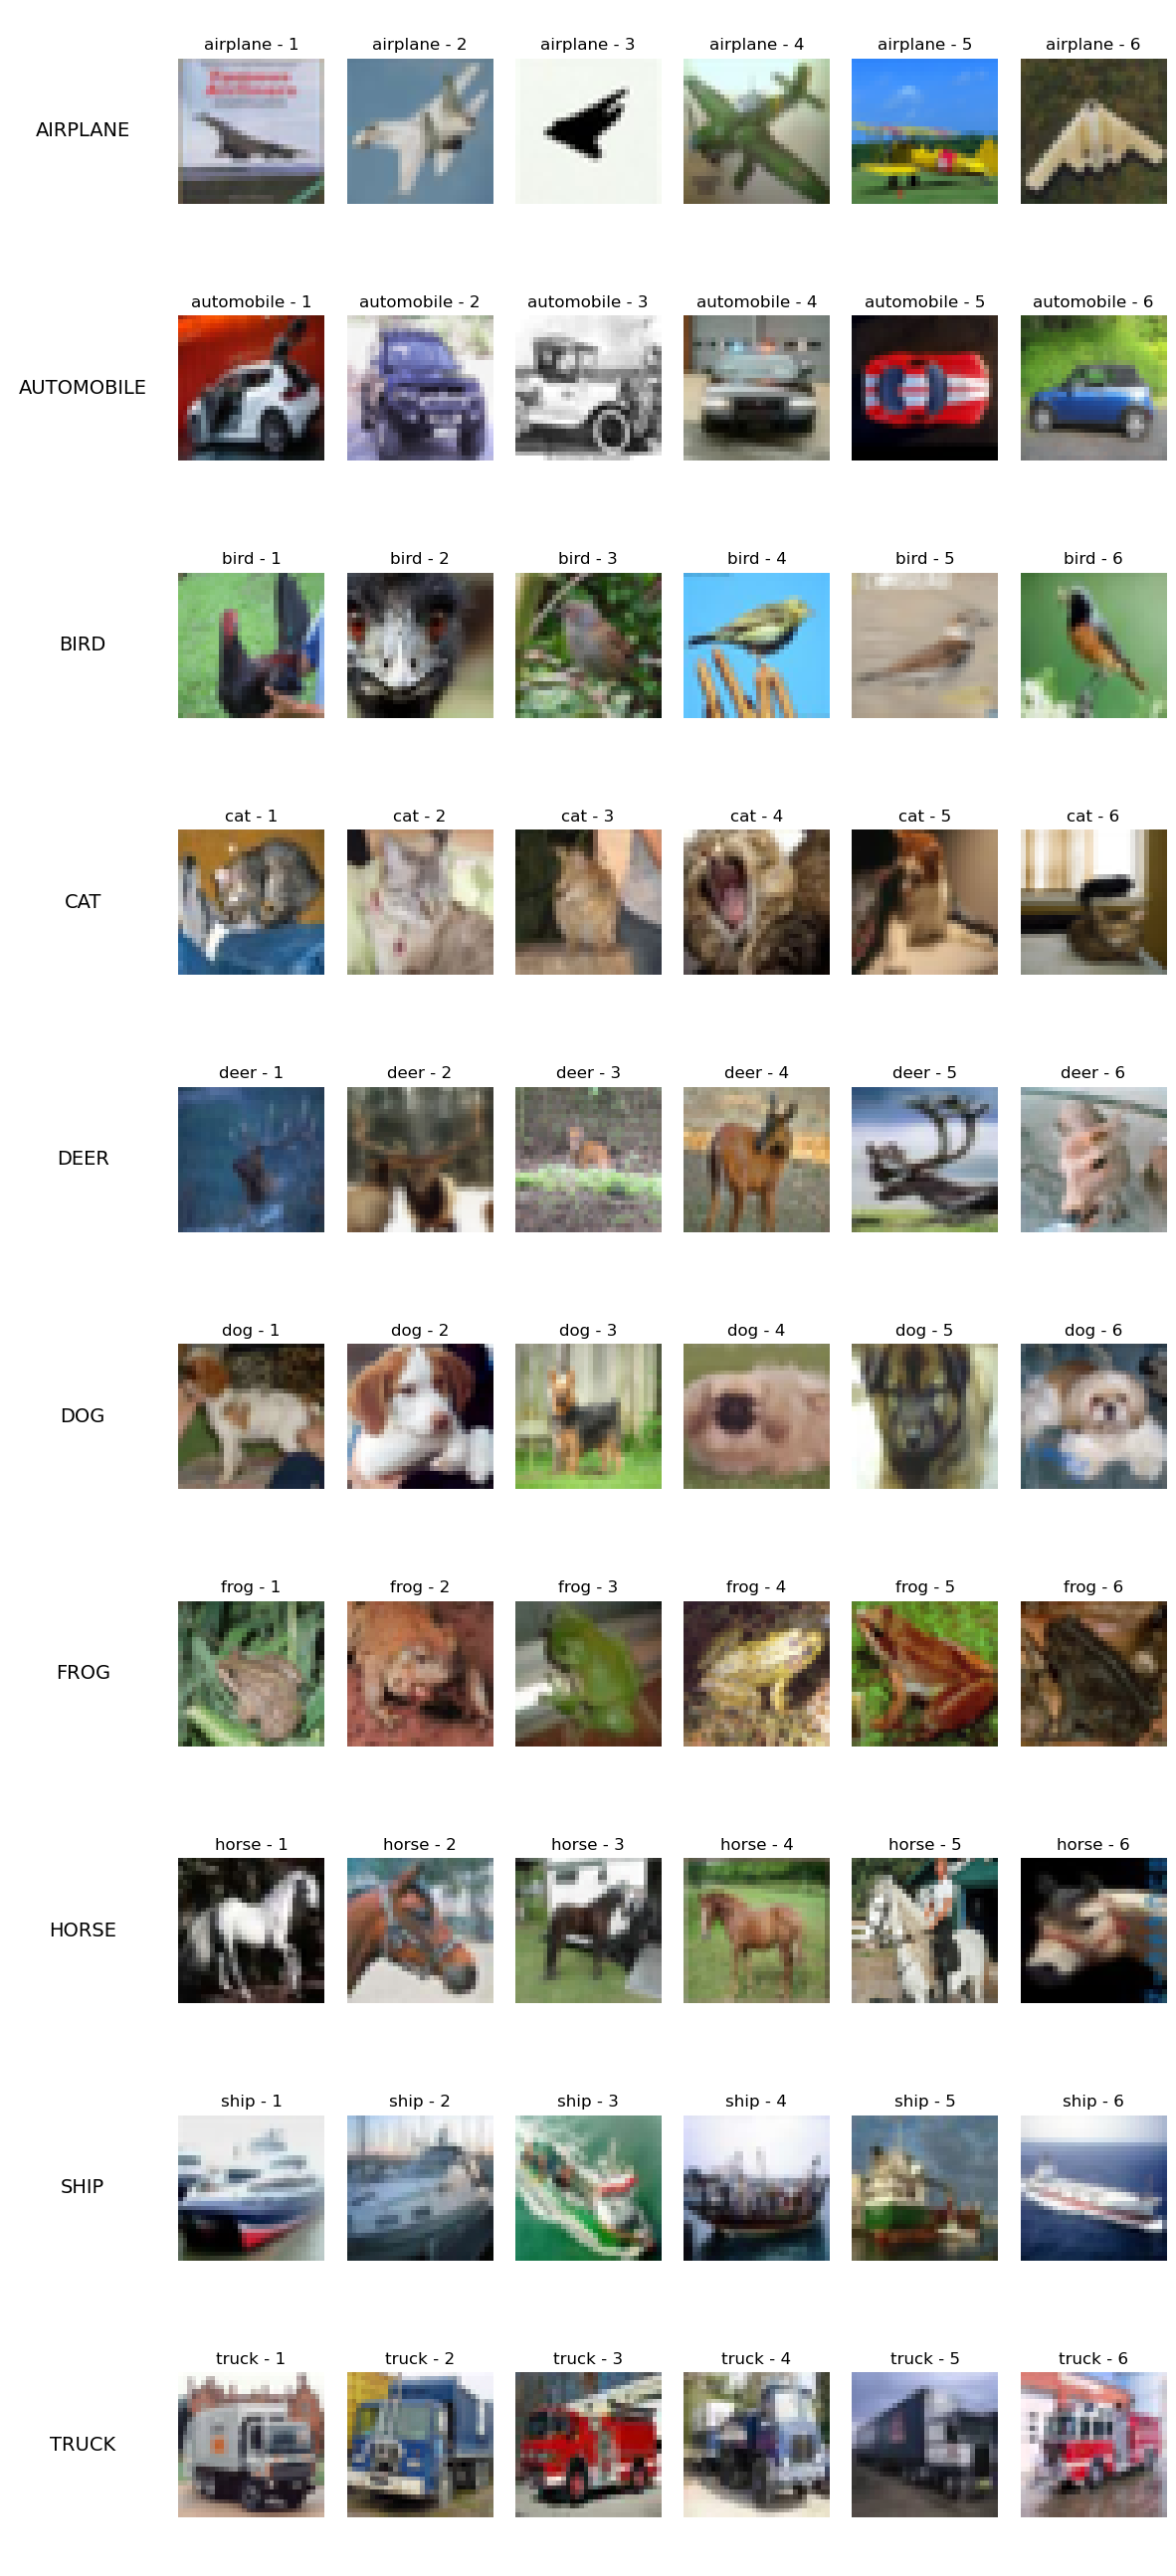

In [5]:
classnames = ['AIRPLANE', 'AUTOMOBILE', 'BIRD', 'CAT', 'DEER', 'DOG', 'FROG', 'HORSE', 'SHIP', 'TRUCK']

plot.figure(figsize=(12, 26))

for class_index in range(10):
    indices = n.where(output_testing == class_index)[0][:6]  
    images, names = input_Testing[indices], output_testing[indices]

    plot.subplot(10, 7, class_index * 7 + 1)
    plot.text(0.5, 0.5, classnames[class_index].upper(), fontsize=14, ha='center', va='center')
    plot.axis('off')

    for i in range(6):
        plot.subplot(10, 7, class_index * 7 + 2 + i)
        plot.imshow(images[i])
        plot.title(classnames[names[i][0]].lower() +" - "+ str(i+1))
        plot.axis('off')

plot.tight_layout()
plot.show()


In [6]:
trainingcount1 = 40000
training_mask = list(range(trainingcount1))
trainining_input1 = input_Training[training_mask]
trainining_output1 = output_training[training_mask]

testingcount1 = 100
testing_mask = list(range(testingcount1))
testing_input1 = input_Testing[testing_mask]
testing_output1 = output_testing[testing_mask]

trainining_input1 = n.reshape(trainining_input1, (trainining_input1.shape[0], -1))
testing_input1 = n.reshape(testing_input1, (testing_input1.shape[0], -1))

trainining_input1 = trainining_input1 / 255.0
testing_input1 = testing_input1 / 255.0
trainining_output1, testing_output1 = trainining_output1.flatten(), testing_output1.flatten()

In [7]:
k_values = [k for k in range(1,40 ,2)]

In [8]:
model1 = KNeighborsClassifier(
    n_neighbors=1,
    weights='distance',
    algorithm='auto',
    n_jobs=-1,
    metric='manhattan',
    p=1,
    leaf_size=30
)

model1.fit(trainining_input1, trainining_output1)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=1, p=1,
                     weights='distance')

In [9]:
accuracy_model1 = []
for k in k_values:
    model1.n_neighbors = k
    Predicted_classes = model1.predict(testing_input1)
    accuracy = accuracy_score(testing_output1, Predicted_classes)
    accuracy_model1.append(accuracy)

In [10]:
print(accuracy_model1)

[0.33, 0.35, 0.39, 0.39, 0.41, 0.39, 0.36, 0.38, 0.39, 0.38, 0.35, 0.36, 0.37, 0.34, 0.35, 0.34, 0.36, 0.34, 0.36, 0.35]


In [11]:
print(round(sum(accuracy_model1) / len(accuracy_model1),3))

0.364


In [12]:
print(round(max(accuracy_model1),2))

0.41


In [13]:
class Custom_KNearestNeighbor(object):
    def __init__(self):
        pass

    def fit(self, A, B):
        self.Inp, self.out = A, B

    def DistanceCalculate(self, A):
        axis = 1
        count = A.shape[0]
        num_train = self.Inp.shape[0]
        cn =[]
        cn.append(count)
        cn.append(num_train)
        distances = n.zeros((cn[0],cn[1]))
        for j in range(count):
            inp_val= A[j, :]
            inp_dif = n.abs(self.Inp - inp_val)
            distances[j, :] = n.sum((inp_dif), axis=axis)
        return distances

    def predict(self, distances, k=1):
        count = distances.shape[0]
        predicted_vals = n.zeros(count)
        for j in range(count):
            nearest = []
            sorted_distances = n.argsort(distances[j])
            s = sorted_distances[0:k]
            nearest = list(self.out[s])
            nearest=n.bincount(nearest)
            predicted_vals[j] = n.argmax(nearest)
        return predicted_vals

In [14]:
# Reducing the load to prevent memory error by subsampling


trainingcount = 15000
mask = list(range(trainingcount))
trainining_input2= input_Training[mask]
trainining_output2 = output_training[mask]

testingcount2 = 100
mask = list(range(testingcount2))
testing_input2 = input_Testing[mask]
testing_output2 = output_testing[mask]

# reshaping and placing data into rows

trainining_input2 = n.reshape(trainining_input2, (trainining_input2.shape[0], -1))
testing_input2 = n.reshape(testing_input2, (testing_input2.shape[0], -1))
print(trainining_input2.shape, testing_input2.shape)

trainining_input2 = trainining_input2 / 255.0
testing_input2 = testing_input2 / 255.0
trainining_output2, testing_output2 = trainining_output2.flatten(), testing_output2.flatten()


(15000, 3072) (100, 3072)


In [15]:
model2 = Custom_KNearestNeighbor()
model2.fit(trainining_input2, trainining_output2)
Cal_distances = model2.DistanceCalculate(testing_input2)

accuracy_model2 = []
for K in k_values:
    predicted_values = model2.predict(Cal_distances, k=K)
    num_correct = n.sum(predicted_values == testing_output2)
    accuracy = float(num_correct) / testingcount2
    accuracy_model2.append(accuracy)

In [16]:
print(accuracy_model2)

[0.3, 0.26, 0.3, 0.34, 0.37, 0.37, 0.37, 0.36, 0.35, 0.36, 0.34, 0.34, 0.33, 0.31, 0.32, 0.34, 0.35, 0.35, 0.34, 0.34]


In [17]:
print(sum(accuracy_model2) / len(accuracy_model2))

0.33699999999999997


In [18]:
print(max(accuracy_model2))

0.37


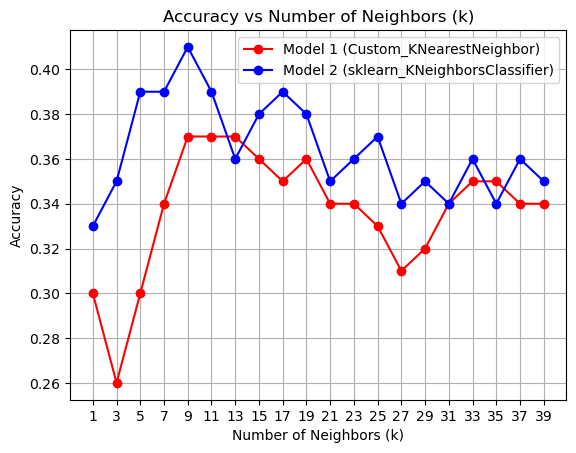

In [19]:
plot.plot(k_values, accuracy_model2, marker='o', label='Model 1 (Custom_KNearestNeighbor)',color='red')
plot.plot(k_values, accuracy_model1, marker='o', label='Model 2 (sklearn_KNeighborsClassifier)',color='blue')
plot.xlabel('Number of Neighbors (k)')
plot.ylabel('Accuracy')
plot.title('Accuracy vs Number of Neighbors (k)')
plot.xticks(k_values)
plot.legend()
plot.grid()
plot.show()